In [1]:
import transformers

model = transformers.AutoModelForSequenceClassification.from_pretrained("textattack/bert-base-uncased-SST-2")
tokenizer = transformers.AutoTokenizer.from_pretrained("textattack/bert-base-uncased-SST-2", use_fast=True)

2022-07-20 10:24:32.184179: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import textattack

model_wrapper = textattack.models.wrappers.HuggingFaceModelWrapper(model, tokenizer)
attack = textattack.attack_recipes.A2TYoo2021.build(model_wrapper)
dataset = textattack.datasets.HuggingFaceDataset("glue", "sst2", split="validation")

# Attack 20 samples with CSV logging and checkpoint saved every 5 interval
attack_args = textattack.AttackArgs(
    num_examples=20,
    csv_coloring_style="plain",
    log_to_csv="../results/log.csv",
    checkpoint_interval=5,
    #disable_stdout=True
)

textattack: Unknown if model of class <class 'transformers.models.bert.modeling_bert.BertForSequenceClassification'> compatible with goal function <class 'textattack.goal_functions.classification.untargeted_classification.UntargetedClassification'>.
Reusing dataset glue (/home/coraline/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

textattack: Loading datasets dataset glue, subset sst2, split validation.


In [3]:
attacker = textattack.Attacker(attack, dataset, attack_args)
results = attacker.attack_dataset()
#for result in results:

textattack: Logging to CSV at path ../results/log.csv


Attack(
  (search_method): GreedyWordSwapWIR(
    (wir_method):  gradient
  )
  (goal_function):  UntargetedClassification
  (transformation):  WordSwapEmbedding(
    (max_candidates):  20
    (embedding):  WordEmbedding
  )
  (constraints): 
    (0): PartOfSpeech(
        (tagger_type):  nltk
        (tagset):  universal
        (allow_verb_noun_swap):  False
        (compare_against_original):  True
      )
    (1): BERT(
        (metric):  cosine
        (threshold):  0.9
        (window_size):  inf
        (skip_text_shorter_than_window):  False
        (compare_against_original):  True
      )
    (2): WordEmbeddingDistance(
        (embedding):  WordEmbedding
        (min_cos_sim):  0.8
        (cased):  False
        (include_unknown_words):  True
        (compare_against_original):  True
      )
    (3): RepeatModification
    (4): StopwordModification
    (5): InputColumnModification(
        (matching_column_labels):  ['premise', 'hypothesis']
        (columns_to_ignore):  {'

  0%|                                                                                    | 0/20 [00:00<?, ?it/s]/home/coraline/anaconda3/envs/dpml/lib/python3.7/site-packages/torch/nn/modules/module.py:1033: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
[Succeeded / Failed / Skipped / Total] 0 / 1 / 0 / 1:   5%|█                     | 1/20 [00:00<00:15,  1.25it/s]

--------------------------------------------- Result 1 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

it 's a charming and [[often]] affecting journey . 

it 's a charming and [[normally]] affecting journey . 

it 's a charming and often affecting journey . 

it 's a charming and normally affecting journey . 




[Succeeded / Failed / Skipped / Total] 0 / 2 / 0 / 2:  10%|██▏                   | 2/20 [00:01<00:09,  1.87it/s]

--------------------------------------------- Result 2 ---------------------------------------------
[[Negative (99%)]] --> [[[FAILED]]]

unflinchingly [[bleak]] and desperate 

unflinchingly [[grim]] and desperate 

unflinchingly bleak and desperate 

unflinchingly grim and desperate 




[Succeeded / Failed / Skipped / Total] 0 / 3 / 0 / 3:  15%|███▎                  | 3/20 [00:01<00:11,  1.52it/s]

--------------------------------------------- Result 3 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

[[allows]] us to [[hope]] that nolan is [[poised]] to [[embark]] a major career as a commercial yet inventive filmmaker . 

[[authorizes]] us to [[hopes]] that nolan is [[prepped]] to [[engage]] a major career as a commercial yet inventive filmmaker . 

allows us to hope that nolan is poised to embark a major career as a commercial yet inventive filmmaker . 

authorizes us to hopes that nolan is prepped to engage a major career as a commercial yet inventive filmmaker . 




[Succeeded / Failed / Skipped / Total] 1 / 3 / 0 / 4:  20%|████▍                 | 4/20 [00:02<00:09,  1.76it/s]

--------------------------------------------- Result 4 ---------------------------------------------
[[Positive (100%)]] --> [[Negative (62%)]]

the acting , costumes , music , cinematography and sound are all [[astounding]] given the [[production]] 's austere locales . 

the acting , costumes , music , cinematography and sound are all [[staggering]] given the [[productivity]] 's austere locales . 

the acting , costumes , music , cinematography and sound are all astounding given the production 's austere locales . 

the acting , costumes , music , cinematography and sound are all staggering given the productivity 's austere locales . 




[Succeeded / Failed / Skipped / Total] 1 / 4 / 0 / 5:  25%|█████▌                | 5/20 [00:02<00:07,  2.00it/s]textattack: Saving checkpoint under "checkpoints/1658337904863.ta.chkpt" at 2022-07-20 10:25:04 after 5 attacks.


--------------------------------------------- Result 5 ---------------------------------------------
[[Negative (100%)]] --> [[[FAILED]]]

it 's slow -- very , very [[slow]] . 

it 's slow -- very , very [[slower]] . 

it 's slow -- very , very slow . 

it 's slow -- very , very slower . 







[Succeeded / Failed / Skipped / Total] 1 / 5 / 0 / 6:  30%|██████▌               | 6/20 [00:03<00:07,  1.90it/s]

--------------------------------------------- Result 6 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

although laced with [[humor]] and a few fanciful touches , the [[film]] is a [[refreshingly]] serious look at young [[women]] . 

although laced with [[mood]] and a few fanciful touches , the [[films]] is a [[cheerfully]] serious look at young [[female]] . 

although laced with humor and a few fanciful touches , the film is a refreshingly serious look at young women . 

although laced with mood and a few fanciful touches , the films is a cheerfully serious look at young female . 




[Succeeded / Failed / Skipped / Total] 1 / 6 / 0 / 7:  35%|███████▋              | 7/20 [00:03<00:06,  2.02it/s]

--------------------------------------------- Result 7 ---------------------------------------------
[[Negative (100%)]] --> [[[FAILED]]]

a [[sometimes]] tedious [[film]] . 

a [[occasionally]] tedious [[movies]] . 

a sometimes tedious film . 

a occasionally tedious movies . 




[Succeeded / Failed / Skipped / Total] 1 / 7 / 0 / 8:  40%|████████▊             | 8/20 [00:03<00:05,  2.16it/s]

--------------------------------------------- Result 8 ---------------------------------------------
[[Negative (99%)]] --> [[[FAILED]]]

or doing last year 's [[taxes]] with your ex-wife . 

or doing last year 's [[taxation]] with your ex-wife . 

or doing last year 's taxes with your ex-wife . 

or doing last year 's taxation with your ex-wife . 




[Succeeded / Failed / Skipped / Total] 1 / 8 / 0 / 9:  45%|█████████▉            | 9/20 [00:04<00:05,  2.07it/s]

--------------------------------------------- Result 9 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

you do n't have to know about music to [[appreciate]] the [[film]] 's easygoing [[blend]] of comedy and [[romance]] . 

you do n't have to know about music to [[thankful]] the [[cinema]] 's easygoing [[amalgam]] of comedy and [[romanticism]] . 

you do n't have to know about music to appreciate the film 's easygoing blend of comedy and romance . 

you do n't have to know about music to thankful the cinema 's easygoing amalgam of comedy and romanticism . 




[Succeeded / Failed / Skipped / Total] 1 / 9 / 0 / 10:  50%|██████████          | 10/20 [00:04<00:04,  2.01it/s]textattack: Saving checkpoint under "checkpoints/1658337907321.ta.chkpt" at 2022-07-20 10:25:07 after 10 attacks.


--------------------------------------------- Result 10 ---------------------------------------------
[[Negative (100%)]] --> [[[FAILED]]]

in exactly 89 minutes , most of which passed as slowly as if i 'd been sitting naked on an igloo , formula 51 [[sank]] from [[quirky]] to jerky to [[utter]] [[turkey]] . 

in exactly 89 minutes , most of which passed as slowly as if i 'd been sitting naked on an igloo , formula 51 [[sunk]] from [[moody]] to jerky to [[absolute]] [[ankara]] . 

in exactly 89 minutes , most of which passed as slowly as if i 'd been sitting naked on an igloo , formula 51 sank from quirky to jerky to utter turkey . 

in exactly 89 minutes , most of which passed as slowly as if i 'd been sitting naked on an igloo , formula 51 sunk from moody to jerky to absolute ankara . 







[Succeeded / Failed / Skipped / Total] 1 / 10 / 0 / 11:  55%|██████████▍        | 11/20 [00:05<00:04,  1.93it/s]

--------------------------------------------- Result 11 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

the mesmerizing performances of the leads [[keep]] the [[film]] [[grounded]] and keep the [[audience]] riveted . 

the mesmerizing performances of the leads [[maintain]] the [[movie]] [[anchored]] and keep the [[spectators]] riveted . 

the mesmerizing performances of the leads keep the film grounded and keep the audience riveted . 

the mesmerizing performances of the leads maintain the movie anchored and keep the spectators riveted . 




[Succeeded / Failed / Skipped / Total] 1 / 11 / 0 / 12:  60%|███████████▍       | 12/20 [00:06<00:04,  1.78it/s]

--------------------------------------------- Result 12 ---------------------------------------------
[[Negative (100%)]] --> [[[FAILED]]]

it takes a [[strange]] [[kind]] of laziness to [[waste]] the talents of robert forster , anne meara , eugene levy , and reginald veljohnson all in the same [[movie]] . 

it takes a [[inquisitive]] [[genus]] of laziness to [[squandering]] the talents of robert forster , anne meara , eugene levy , and reginald veljohnson all in the same [[film]] . 

it takes a strange kind of laziness to waste the talents of robert forster , anne meara , eugene levy , and reginald veljohnson all in the same movie . 

it takes a inquisitive genus of laziness to squandering the talents of robert forster , anne meara , eugene levy , and reginald veljohnson all in the same film . 




[Succeeded / Failed / Skipped / Total] 1 / 12 / 1 / 14:  70%|█████████████▎     | 14/20 [00:07<00:03,  1.93it/s]

--------------------------------------------- Result 13 ---------------------------------------------
[[Negative (100%)]] --> [[[FAILED]]]

... the film [[suffers]] from a lack of [[humor]] ( something [[needed]] to [[balance]] out the violence ) ... 

... the film [[undergo]] from a lack of [[mood]] ( something [[need]] to [[balancing]] out the violence ) ... 

... the film suffers from a lack of humor ( something needed to balance out the violence ) ... 

... the film undergo from a lack of mood ( something need to balancing out the violence ) ... 


--------------------------------------------- Result 14 ---------------------------------------------
[[Negative (64%)]] --> [[[SKIPPED]]]

we root for ( clara and paul ) , even like them , though perhaps it 's an emotion closer to pity . 




[Succeeded / Failed / Skipped / Total] 1 / 13 / 1 / 15:  75%|██████████████▎    | 15/20 [00:07<00:02,  1.92it/s]textattack: Saving checkpoint under "checkpoints/1658337910165.ta.chkpt" at 2022-07-20 10:25:10 after 15 attacks.


--------------------------------------------- Result 15 ---------------------------------------------
[[Negative (100%)]] --> [[[FAILED]]]

even horror fans will most [[likely]] not find what they 're seeking with [[trouble]] every day ; the movie [[lacks]] both thrills and [[humor]] . 

even horror fans will most [[perhaps]] not find what they 're seeking with [[difficulty]] every day ; the movie [[lacked]] both thrills and [[comedy]] . 

even horror fans will most likely not find what they 're seeking with trouble every day ; the movie lacks both thrills and humor . 

even horror fans will most perhaps not find what they 're seeking with difficulty every day ; the movie lacked both thrills and comedy . 







[Succeeded / Failed / Skipped / Total] 1 / 14 / 1 / 16:  80%|███████████████▏   | 16/20 [00:08<00:02,  1.83it/s]

--------------------------------------------- Result 16 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

a [[gorgeous]] , high-spirited [[musical]] from india that [[exquisitely]] blends music , dance , song , and high [[drama]] . 

a [[magnifique]] , high-spirited [[music]] from india that [[finely]] blends music , dance , song , and high [[teatro]] . 

a gorgeous , high-spirited musical from india that exquisitely blends music , dance , song , and high drama . 

a magnifique , high-spirited music from india that finely blends music , dance , song , and high teatro . 




[Succeeded / Failed / Skipped / Total] 1 / 15 / 1 / 17:  85%|████████████████▏  | 17/20 [00:09<00:01,  1.86it/s]

--------------------------------------------- Result 17 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

the emotions are [[raw]] and will strike a nerve with anyone who 's ever had family trauma . 

the emotions are [[untreated]] and will strike a nerve with anyone who 's ever had family trauma . 

the emotions are raw and will strike a nerve with anyone who 's ever had family trauma . 

the emotions are untreated and will strike a nerve with anyone who 's ever had family trauma . 




[Succeeded / Failed / Skipped / Total] 1 / 16 / 1 / 18:  90%|█████████████████  | 18/20 [00:09<00:01,  1.82it/s]

--------------------------------------------- Result 18 ---------------------------------------------
[[Positive (100%)]] --> [[[FAILED]]]

audrey tatou has a knack for picking roles that magnify her [[outrageous]] charm , and in this [[literate]] french [[comedy]] , she 's as morning-glory [[exuberant]] as she was in amélie . 

audrey tatou has a knack for picking roles that magnify her [[repugnant]] charm , and in this [[schooled]] french [[parody]] , she 's as morning-glory [[luxuriant]] as she was in amélie . 

audrey tatou has a knack for picking roles that magnify her outrageous charm , and in this literate french comedy , she 's as morning-glory exuberant as she was in amélie . 

audrey tatou has a knack for picking roles that magnify her repugnant charm , and in this schooled french parody , she 's as morning-glory luxuriant as she was in amélie . 




[Succeeded / Failed / Skipped / Total] 1 / 17 / 1 / 19:  95%|██████████████████ | 19/20 [00:10<00:00,  1.86it/s]

--------------------------------------------- Result 19 ---------------------------------------------
[[Negative (100%)]] --> [[[FAILED]]]

... the [[movie]] is just a plain old [[monster]] . 

... the [[films]] is just a plain old [[monsters]] . 

... the movie is just a plain old monster . 

... the films is just a plain old monsters . 




[Succeeded / Failed / Skipped / Total] 2 / 17 / 1 / 20: 100%|███████████████████| 20/20 [00:11<00:00,  1.81it/s]textattack: Saving checkpoint under "checkpoints/1658337913384.ta.chkpt" at 2022-07-20 10:25:13 after 20 attacks.


--------------------------------------------- Result 20 ---------------------------------------------
[[Negative (100%)]] --> [[Positive (51%)]]

in its [[best]] moments , [[resembles]] a [[bad]] high school production of grease , without benefit of [[song]] . 

in its [[finest]] moments , [[reminds]] a [[wicked]] high school production of grease , without benefit of [[chanson]] . 

in its best moments , resembles a bad high school production of grease , without benefit of song . 

in its finest moments , reminds a wicked high school production of grease , without benefit of chanson . 







[Succeeded / Failed / Skipped / Total] 2 / 17 / 1 / 20: 100%|███████████████████| 20/20 [00:11<00:00,  1.81it/s]


+-------------------------------+--------+
| Attack Results                |        |
+-------------------------------+--------+
| Number of successful attacks: | 2      |
| Number of failed attacks:     | 17     |
| Number of skipped attacks:    | 1      |
| Original accuracy:            | 95.0%  |
| Accuracy under attack:        | 85.0%  |
| Attack success rate:          | 10.53% |
| Average perturbed word %:     | 18.75% |
| Average num. words per input: | 15.8   |
| Avg num queries:              | 14.26  |
+-------------------------------+--------+


In [4]:
idx=12
perturbed_text = results[idx].perturbed_result.attacked_text
trans_prov = perturbed_text.transformation_provenance.history.pop()

In [5]:
from lineage.utils import dynamic_import
import json

In [6]:
last_trans = json.loads(trans_prov[1])
last_trans

{'module_name': 'textattack.transformations.word_swaps.word_swap_embedding',
 'class_name': 'WordSwapEmbedding',
 'trans_fn_name': '_get_transformations',
 'init_args': [],
 'init_kwargs': {'max_candidates': 20},
 'transform_args': ['<AttackedText "... the film undergo from a lack of humor ( something needed to balance out the violence ) ... ">',
  '{7}'],
 'transform_kwargs': {}}

In [7]:
trans_obj = dynamic_import(last_trans['module_name'], last_trans['class_name'])(
    *last_trans['init_args'], **last_trans['init_kwargs'])

In [8]:
trans_fn = getattr(trans_obj, last_trans['trans_fn_name'])

In [9]:
perturbed_text.feature_provenance

<FeatureProvenance[edit_seq] {(2, (11, 12), 'replace: [11,12]-[11,12]'), (1, (7, 8), 'replace: [7,8]-[7,8]'), (3, (9, 10), 'replace: [9,10]-[9,10]'), (0, (2, 3), 'replace: [2,3]-[2,3]')}>

## Visualize Attribution

In [5]:
import numpy as np
import lime
import torch
import torch.nn.functional as F
from lime.lime_text import LimeTextExplainer


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def target_model_predictor(texts):
    model.eval()
    inputs = tokenizer(texts, return_tensors="pt", padding=True).to(device)
    outputs = model(**inputs)
    probas = F.softmax(outputs.logits).detach().cpu().numpy()
    return probas

class_names = ['negative','positive']

explainer = LimeTextExplainer(class_names=class_names)

In [6]:
def get_texts_and_order(results, idx):
    original_text = results[idx].original_result.attacked_text
    perturbed_text = results[idx].perturbed_result.attacked_text
    original_words = original_text.words
    perturbed_words = perturbed_text.words
    
    transformation_history = perturbed_text.le_attrs['transformation_provenance']
    feature_history = perturbed_text.le_attrs['feature_provenance']
    print("transformation history:")
    print(transformation_history)
    print("feature history:")
    print(feature_history)

    order = {}
    for trans in feature_history.history:
        ind = trans[1][0]
        order[ind]= trans[0]
        
    #modified_inds = []
    #for i, token in enumerate(perturbed_text.tokens):
    #    if token.le_attrs['ops']:
    #        modified_inds.append(i)
    
    return original_words, perturbed_words, order

In [7]:
def get_explanations(results, idx, explainer, target_model_predictor):
    original_text = results[idx].original_result.attacked_text
    perturbed_text = results[idx].perturbed_result.attacked_text
    
    exp1 = explainer.explain_instance(original_text.printable_text(), target_model_predictor, num_features=5, num_samples=100).as_map()[1]
    exp2 = explainer.explain_instance(perturbed_text.printable_text(), target_model_predictor, num_features=5, num_samples=100).as_map()[1]
    
    return (exp1, exp2)

In [8]:
import matplotlib.pyplot as plt

def get_ax_size(ax, fig):
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    width *= fig.dpi
    height *= fig.dpi
    return width, height

In [9]:
def draw_exp_and_order(exps, original_words, perturbed_words, lengths):
    exp1, exp2 = exps
    fig, ax = plt.subplots(2, len(original_words), figsize=(20,2), sharex=True, gridspec_kw={'width_ratios': lengths})

    exp1_iter = iter(sorted(exp1))
    exp2_iter = iter(sorted(exp2))

    cur_exp1 = next(exp1_iter)
    cur_exp2 = next(exp2_iter)


    for i in range(len(original_words)):
        cur_ax = ax[1, i]
        above_ax = ax[0, i]
        
        width, height = get_ax_size(cur_ax, fig)
        width = width / height
        
        above_ax.set_axis_off()
        cur_ax.set_axis_off()

        color1 = color2 = 'black'
        if i in order:
            color1 = 'green'
            color2 = 'red'
            cur_ax.annotate(str(order[i]), xy=(0.5, 0.2), xytext=(0.5, -0.5),
                           fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
                           bbox=dict(boxstyle='circle', fc='0.95'),
                           arrowprops=dict(arrowstyle=f'-[, widthB={width}, lengthB=.5', lw=1.5))
        pos_color = 'orange'
        neg_color = 'purple'

        kwargs1 = dict()
        if cur_exp1 and cur_exp1[0] == i:
            box_color = neg_color
            score = cur_exp1[1]
            if score > 0:
                box_color = pos_color
            try:
                cur_exp1 = next(exp1_iter)
            except StopIteration:
                cur_exp1 = None

            kwargs1 = dict(bbox=dict(facecolor=box_color, alpha= abs(score), edgecolor=box_color))

        kwargs2 = dict()
        if cur_exp2 and cur_exp2[0] == i:
            box_color = neg_color
            score = cur_exp2[1]
            if score > 0:
                box_color = pos_color
            try:
                cur_exp2 = next(exp2_iter)
            except StopIteration:
                cur_exp2 = None
            kwargs2 = dict(bbox=dict(facecolor=box_color, alpha= abs(score), edgecolor=box_color))

        above_ax.text(.5, 0, original_words[i], fontsize=16, color=color1, **kwargs1, horizontalalignment='center', verticalalignment='center',)
        cur_ax.text(.5, .6, perturbed_words[i], fontsize=16, color=color2, **kwargs2, horizontalalignment='center', verticalalignment='center',)


transformation history:
{(1, '{\'module_name\': \'textattack.transformations.word_swaps.word_swap_embedding\', \'class_name\': \'WordSwapEmbedding\', \'trans_fn_name\': \'_get_transformations\', \'init_args\': \'null\', \'init_kwargs\': \'{"max_candidates": 20}\', \'transform_args\': \'null\', \'transform_kwargs\': \'{}\'}'), (2, '{\'module_name\': \'textattack.transformations.word_swaps.word_swap_embedding\', \'class_name\': \'WordSwapEmbedding\', \'trans_fn_name\': \'_get_transformations\', \'init_args\': \'null\', \'init_kwargs\': \'{"max_candidates": 20}\', \'transform_args\': \'null\', \'transform_kwargs\': \'{}\'}'), (0, '{\'module_name\': \'textattack.transformations.word_swaps.word_swap_embedding\', \'class_name\': \'WordSwapEmbedding\', \'trans_fn_name\': \'_get_transformations\', \'init_args\': \'null\', \'init_kwargs\': \'{"max_candidates": 20}\', \'transform_args\': \'null\', \'transform_kwargs\': \'{}\'}'), (3, '{\'module_name\': \'textattack.transformations.word_swaps.wor

/home/coraline/anaconda3/envs/dpml/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]
/home/coraline/anaconda3/envs/dpml/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


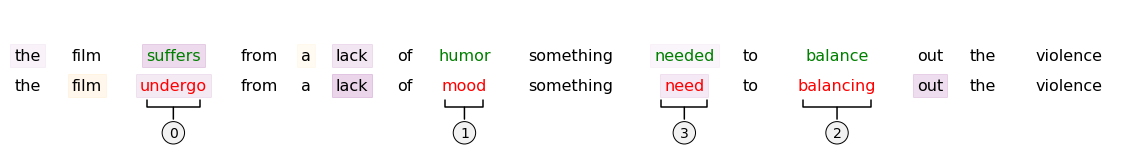

In [13]:
idx = 12
original_words, perturbed_words, order = get_texts_and_order(results, idx)
exps = get_explanations(results, idx, explainer, target_model_predictor)
lengths = list(map(lambda x, y: max(len(x), len(y)), original_words, perturbed_words))
draw_exp_and_order(exps, original_words, perturbed_words, lengths)

## infer transformation history

In [4]:
from lineage import InferQuery
queryAPI = InferQuery()

In [5]:
for result in results:
    original_text = result.original_result.attacked_text
    perturbed_text = result.perturbed_result.attacked_text
    
    trans_trace = queryAPI.get_transfromation_history(perturbed_text)
    
    for trans in trans_trace:
        print(trans)
    print()

it 's a charming and often affecting journey . 
{'class': 'WordSwapEmbedding', 'max_candidates': 20, 'embedding': WordEmbedding}:
	replace [5]-->[5]
it 's a charming and normally affecting journey . 

unflinchingly bleak and desperate 
{'class': 'WordSwapEmbedding', 'max_candidates': 20, 'embedding': WordEmbedding}:
	replace [1]-->[1]
unflinchingly grim and desperate 

allows us to hope that nolan is poised to embark a major career as a commercial yet inventive filmmaker . 
{'class': 'WordSwapEmbedding', 'max_candidates': 20, 'embedding': WordEmbedding}:
	replace [7]-->[7]
allows us to hope that nolan is prepped to embark a major career as a commercial yet inventive filmmaker . 
{'class': 'WordSwapEmbedding', 'max_candidates': 20, 'embedding': WordEmbedding}:
	replace [3]-->[3]
allows us to hopes that nolan is prepped to embark a major career as a commercial yet inventive filmmaker . 
{'class': 'WordSwapEmbedding', 'max_candidates': 20, 'embedding': WordEmbedding}:
	replace [0]-->[0]
a